## Занятие 5
## Математический анализ
## Численное решение нелинейных уравнений: nsolve
https://docs.sympy.org/latest/modules/solvers/solvers.html?highlight=nsolve#sympy.solvers.solvers.nsolve

Уравнение в форме $f(x)=0$ можно решить численно с помощью nsolve(), для этого нужно задать выражение, определяющее функцию, переменную и начальное приближение.

nsolve(f, [args,] x0, modules=['mpmath'], **kwargs)

f  - вектор-функция, состоящая из символьных выражений, представляющих систему уравнений,

args  - переменные (если переменная одна, ее можно не указывать)

x0 - начальное приближение

Выбирая название модуля, можно решать уравнение определенным способом (есть дихотомия 'bisect').
Требуется, чтобы модуль поддерживал работу с матрицами. 

Поддерживаются также переопределенные системы уравнений.

Точность решения определяется параметром по умолчанию prec (число знаков после запятой в результате).

Например, nsolve(cos(x) - x, 1, prec=50)

In [11]:
import sympy

### Пример 1
Решим уравнение $x^2-1=0$ с помощью solveset и nsolve, для nsolve укажем начальное приближение 3:

In [12]:
from sympy.abc import x # Это альтернативный способ определения символа.
display(sympy.solveset(x**2 - 1))
sympy.nsolve(x**2 - 1, x, 3)

{-1, 1}

1.00000000000000

Заметим, что nsolve выдает только одно решение.

Используем другое начальное приближение.

In [13]:
sympy.nsolve(x**2 - 1, x, -3)

-1.00000000000000

### Пример 2.
Решим уравнение $2\sin x-x = 0$ с начальным приближением 1:

In [14]:
sympy.nsolve(2*sympy.sin(x) - x, x, 1)

1.89549426703398

Построим график $2\sin x - x$ и найдем все три корня, выбирая близкое к каждому из них начальное приближение:

-1.89549426703398
0
1.89549426703398


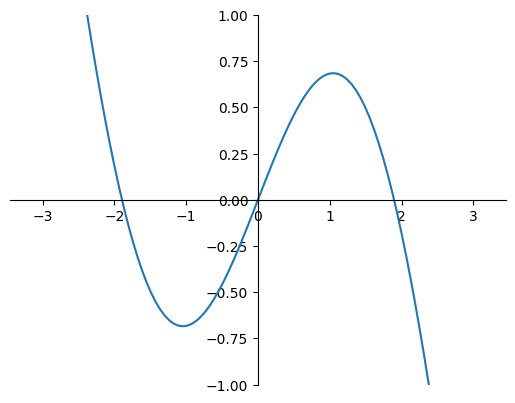

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
X = np.linspace(-np.pi, np.pi, 100)
plt.plot(X, 2*np.sin(X) - X)
ax = plt.gca()  
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
plt.ylim(-1, 1)
print(sympy.nsolve(2*sympy.sin(x) - x, x, 0.8))
print(sympy.nsolve(2*sympy.sin(x) - x, x, 0.1))
print(sympy.nsolve(2*sympy.sin(x) - x, x, 2))

### Пример 3.
Попробуем решить уравнение, не имеющее вещественных корней $x^2+1=0$ 

In [16]:
sympy.nsolve(x**2 + 1, x, 1)

Ошибка: не удается найти корень с заданной точностью. Попробуйте другое начальное приближение.

Попробуем в качестве начального приближения комплексное число I:

In [17]:
sympy.nsolve(x**2 + 1, x, sympy.I)

1.0*I

С помощью nsolve можно решать системы уравнений, в т.ч. нелинейных.
### Пример 4.
Дана система уравнений:
$$
\left\{
\begin{matrix}
(x-2)^2+(y-3)^2=25\\
2(x-2)^2+3(y-3)^2=66
\end{matrix}
\right.
$$
Зададим левые части в виде функций:
$$
f(x) = (x - 2)^2 + (y - 3)^2,\qquad
g(x) = 2(x - 2)^2 + 3(y - 3)^2,
$$
составим уравнения с помощью Eq, в качестве
начального приближения возьмем (0,0).

In [18]:
from sympy.abc import y
def f(x, y):
    return (x - 2)**2 + (y - 3)**2
def g(x, y):
    return 2*(x - 2)**2 + 3*(y - 3)**2
root = sympy.nsolve((sympy.Eq(f(x, y), 25), sympy.Eq(g(x, y), 66)), (x, y), (0, 0))
root

Matrix([
[-1.0],
[-1.0]])

Проверим подстановкой:

In [19]:
x0, y0 = root
f(x0, y0) == 25 and g(x0, y0) == 66

True

### Пример 5.
Найдем точку пересечения параболлоида Т и прямой, заданной параметрически:
$$
L:\quad\left\{
\begin{matrix}
x = 3 + 5t\\
y = -2 + t\\
z = -5t
\end{matrix}
\right.,
\qquad T:
(x - 3)^2 + (y + 2)^2 - 2z = 0
$$

In [20]:
from sympy.abc import z, t
variables = (x, y, z, t)
L = [sympy.Eq(x, 3 + 5*t), sympy.Eq(y, -2 + t), sympy.Eq(z, - 5*t)]
T = sympy.Eq((x - 3)**2 + (y + 2)**2 - 2*z, 0, evaluate=False)
L.append(T)
res = sympy.nsolve(L, variables, (1, 1, 1, 1))
res

Matrix([
[  1.07692307692308],
[ -2.38461538461538],
[  1.92307692307692],
[-0.384615384615385]])

Подставим:

In [21]:
[equation.subs({var: res[i] for i, var in enumerate(variables)}) for equation in L]

[True, True, True, True]

Найденное решение с допустимой точностью удовлетворяет всем уравнениям системы, т.е. точка лежит и на прямой, и на параболлоиде.

### Пример 6.
В общей координатной плоскости построить графики функций $\log_2(1 + 3x^2)$ и $\cos(2x - 1)$ на отрезке $[-2,\ 2]$, отметить точки пересечения графиков, подписать их $A_1$, $A_2$, ... Отметки по горизонтальной оси сделать в точках  $\frac{\pi n}{4}$, $n$ - целое, и в целочисленных точках, отметки подписать значениями (при необходимости - формулами!).

Вначале опишем функции так, чтобы в них можно было использовать $\log_2$ и $\cos$ из sympy и numpy, в зависимости от контекста.

In [22]:
def f(x, lib='sympy'):
    if lib == 'sympy':
        return sympy.log(1 + 3*x**2, 2)
    if lib == 'numpy':
        return np.log2(1 + 3*x**2)
    return 'error'
def g(x, lib='sympy'):
    if lib == 'sympy':
        return sympy.cos(2*x - 1)
    if lib == 'numpy':
        return np.cos(2*x - 1)
    return 'error'

Построим графики на указанном в условии промежутке, чтобы примерно оценить начальное приближение и число корней.

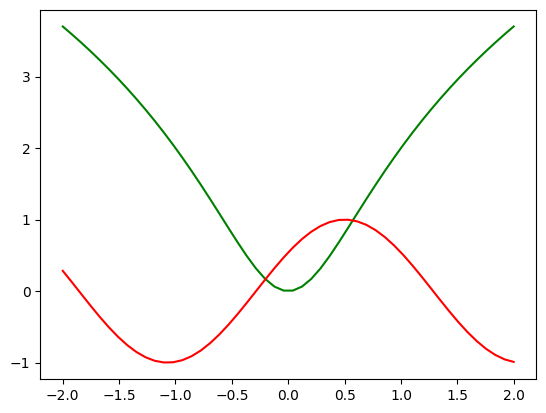

In [23]:
X = np.linspace(-2, 2)
plt.plot(X, f(X, lib='numpy'), color='green')
plt.plot(X, g(X, lib='numpy'), color='red', )

В качестве начального приближения для nsolve используем 0 и 1:

In [24]:
from sympy.abc import x
roots = [sympy.nsolve(sympy.Eq(f(x, lib='sympy'), g(x, lib='sympy')), x, x0) for x0 in [0, 1]]
roots

[-0.201836142021704, 0.573082928246172]

В случае, если nsolve не может найти решение с заданной точностью, используя метод по умолчанию, можно найти корни методом деления отрезка пополам. При это можно отключить проверку полученного решения, если не удается решить с заданной точностью. С отлюченной проверкой можно получить неверное решение, поэтому в таком случае следует провести какую-то свою проверку найденного решения.

Для использования дихотомии (деление пополам) используем  solver='bisect', при этом начальным приближением служит не число, а отрезок, на котором ищем корень, отключаем проверку  verify=False.

In [25]:
roots = [sympy.nsolve(sympy.Eq(f(x, lib='sympy'), g(x, lib='sympy')), x, 
                      interval, solver='bisect', verify=False) for interval in [[-0.5, 0], [0.5, 1]]]
roots

[-0.201836142021704, 0.573082928246172]

Для отметок на горизонтальной оси вначале найдем пересечение $\frac{\pi n}{4}$, $n$ - целое, с отрезком $[-2,\ 2]$

In [26]:
my_ticks0 = sympy.Intersection({sympy.pi*n/4 for n in range(-5, 5)}, sympy.Interval(-2, 2))

Добавим в это множество целые точки из $[-2,\ 2]$ и преобразуем в список:

In [27]:
my_ticks = list(sympy.Union(my_ticks0, set(range(-2, 3))))
my_ticks

[-2, -1, 0, 1, 2, -pi/2, -pi/4, pi/4, pi/2]

Составим на основе этого списка список надписей для отметок по оси:

In [28]:
my_ticks_annotate = [r'$'+ sympy.latex(item) + r'$' for item in my_ticks]
my_ticks_annotate

['$-2$',
 '$-1$',
 '$0$',
 '$1$',
 '$2$',
 '$- \\frac{\\pi}{2}$',
 '$- \\frac{\\pi}{4}$',
 '$\\frac{\\pi}{4}$',
 '$\\frac{\\pi}{2}$']

Построим график, используем найденные координаты точек пересечения для задания местоположения подписей к этим точкам:

C:\Users\Владимир\AppData\Local\Temp\ipykernel_9024\3802990605.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(my_ticks_annotate)  # Установить текущие позиции и метки.


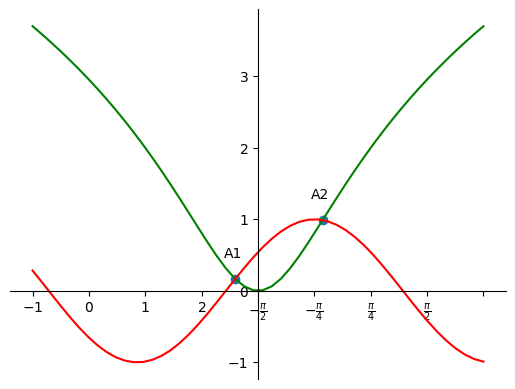

In [29]:
X = np.linspace(-2, 2)
ax = plt.gca() # get current axes - получить текущую систему координат
ax.plot(X, f(X, lib='numpy'), color='green')
ax.plot(X, g(X, lib='numpy'), color='red')
y_coord = [f(float(root), lib='numpy') for root in roots]
ax.scatter(roots, y_coord)
for i, x_coord in enumerate(roots): # Чтобы не писать много раз один длинный код, сделаем подписи в цикле
    ax.annotate('A' + str(i + 1),
            xy=(x_coord, y_coord[i]), xycoords='data', # Координаты подписываемой точки
            xytext=(x_coord - 0.1, y_coord[i] + 0.3), textcoords='data' # Координаты текста подписи, смещены от точки
            ) # Скобка на отдельной строчке, чтобы было видно, что скобки сбалансированы, это делать не обязательно
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))  
# ax.set_xticks(my_ticks)
ax.set_xticklabels(my_ticks_annotate)  # Установить текущие позиции и метки.
pass